In [1]:
import numpy as np
import pandas as pd

import torch

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.rc('font', size=22)

In [4]:
import sys

In [5]:
from copy import deepcopy

In [6]:
sys.path.append('../')
sys.path.append('../../')

In [8]:
train_target = pd.read_csv('../data/train_target.csv')
train_target['client_id'] = train_target['client_id'].astype(str)
train_target.head(5)

,client_id,bins
0,24662,2
1,1046,0
2,34089,2
3,34848,1
4,47076,3


In [9]:
df_vectors = pd.read_pickle('../data/mles_embeddings.pickle').set_index('client_id')
embedding_columns = df_vectors.columns.tolist()
df_vectors = pd.merge(df_vectors, train_target.set_index('client_id'), left_index=True, right_index=True)
df_vectors.head()

,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v791,v792,v793,v794,v795,v796,v797,v798,v799,bins
client_id,,,,,,,,,,,,,,,,,,,,,
10096,0.002540,-0.005814,0.003075,0.000763,0.001085,0.010528,0.047177,-0.000173,0.001823,0.036161,...,0.115117,-0.001076,-0.000112,0.007076,-0.001638,0.002652,0.015716,-0.001403,0.001100,0
10146,0.000764,0.000384,0.003054,0.000874,0.001112,0.000896,-0.008837,-0.000164,0.003777,-0.014364,...,-0.015913,0.000428,0.000026,0.000893,-0.000077,0.002247,0.000967,0.000328,0.001112,3
10351,0.011603,-0.009851,0.001267,0.000826,0.001155,0.036034,-0.036060,-0.000141,0.012157,0.024115,...,0.126044,0.002940,-0.000064,0.001008,-0.001155,0.003200,-0.015364,0.002671,0.001165,3
1059,-0.000162,0.000527,0.000837,0.000809,0.001116,0.000362,-0.103927,0.000200,0.005855,0.014762,...,-0.040961,0.000818,0.000142,0.000670,0.000234,0.000565,-0.014487,0.000810,0.001129,1
10765,0.000412,-0.000016,-0.002424,0.000878,0.001154,0.000733,0.084112,0.000401,0.006892,0.101819,...,0.075938,-0.001231,0.000135,0.000442,-0.002141,0.000714,-0.002687,0.000211,0.001165,1


In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [11]:
df_pca = df_vectors.copy()

In [12]:
pca = PCA(n_components=32)
pca.fit(df_pca[embedding_columns].values)
np.sum(pca.explained_variance_ratio_)

0.79501486

In [13]:
pca_results = pca.transform(df_pca[embedding_columns].values)
df_pca['_pca_x'] = pca_results[:, 0]
df_pca['_pca_y'] = pca_results[:, 1]

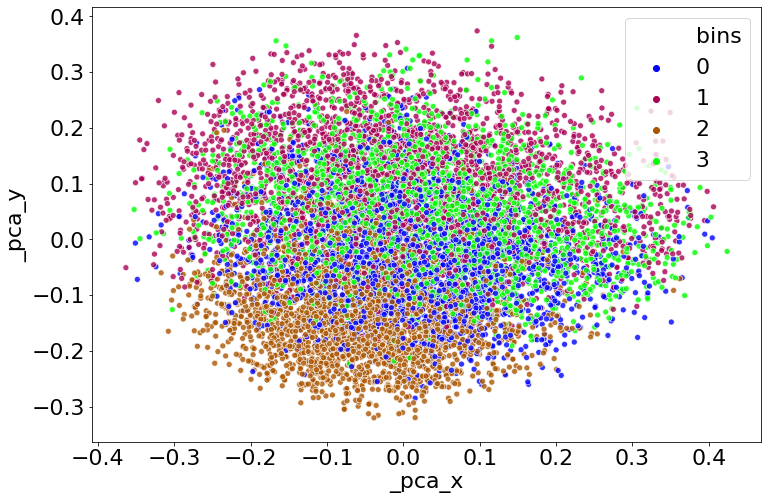

In [14]:
_, axs = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(
    x='_pca_x', y='_pca_y',
    hue='bins',
    # style='bins',
    data=df_pca.sample(n=10000),
    palette='brg',
    alpha=0.8,
    ax=axs,
    markers=['o', 'd', '*' , '.']
)
plt.show()

Относительный порядок категорий: 1 - 3 - 0 - 2

In [15]:
if len(df_pca) > 40000:
    df_tsne = df_pca.sample(n=40000).copy()
else:
    df_tsne = df_pca.copy()

In [16]:
tsne = TSNE(n_components=2, verbose=1, n_iter=300, metric='cosine')
tsne_results = tsne.fit_transform(df_tsne[embedding_columns].values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.024s...
[t-SNE] Computed neighbors for 30000 samples in 15.377s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

In [17]:
df_tsne['tSNE[0]'] = tsne_results[:, 0]
df_tsne['tSNE[1]'] = tsne_results[:, 1]

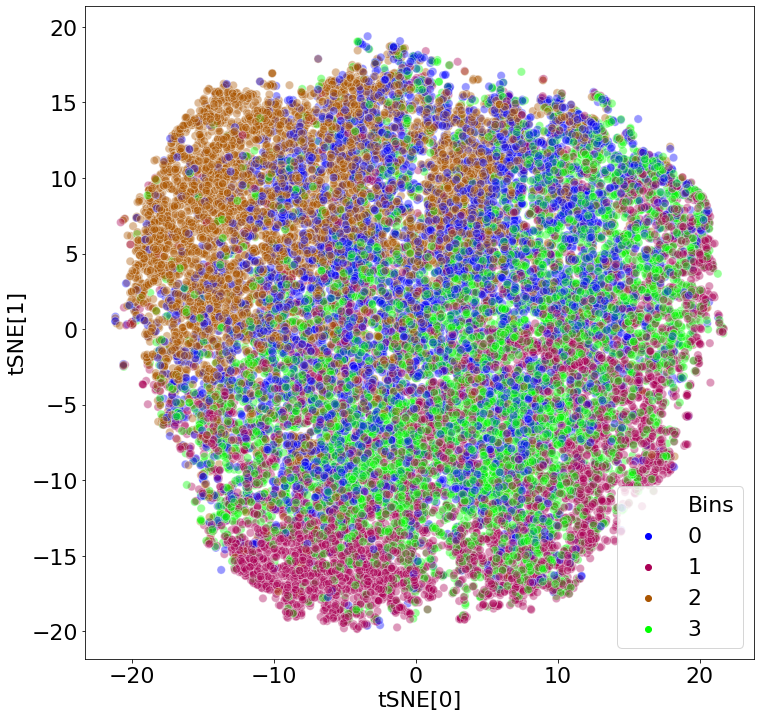

In [18]:
_, axs = plt.subplots(1, 1, figsize=(12, 12))
sns.scatterplot(
    x='tSNE[0]', y='tSNE[1]',
    hue='Bins',
    data=df_tsne.rename(columns={'bins': 'Bins'}),
    palette='brg',
    alpha=0.4, s=70,  
    ax=axs,
)
# plt.show()

plt.savefig('age-pred-tsne.pdf')